Week 3: Exploratory Data Analysis (EDA)

In [1]:
# Import Libraries & Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#For preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("fetal_health.csv")

In [5]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_2684\1195250279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fetal_health", palette="viridis")


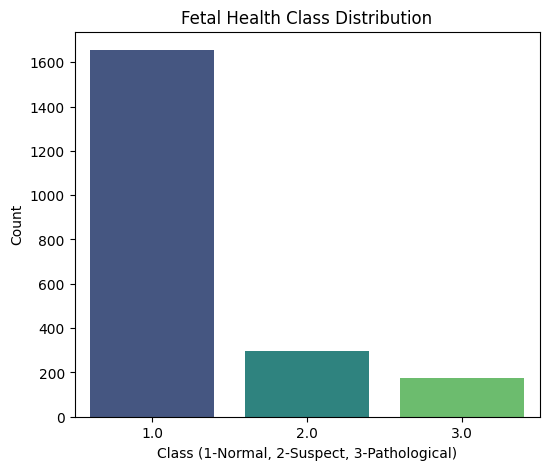

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [6]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="fetal_health", palette="viridis")
plt.title("Fetal Health Class Distribution")
plt.xlabel("Class (1-Normal, 2-Suspect, 3-Pathological)")
plt.ylabel("Count")
plt.show()

df["fetal_health"].value_counts()


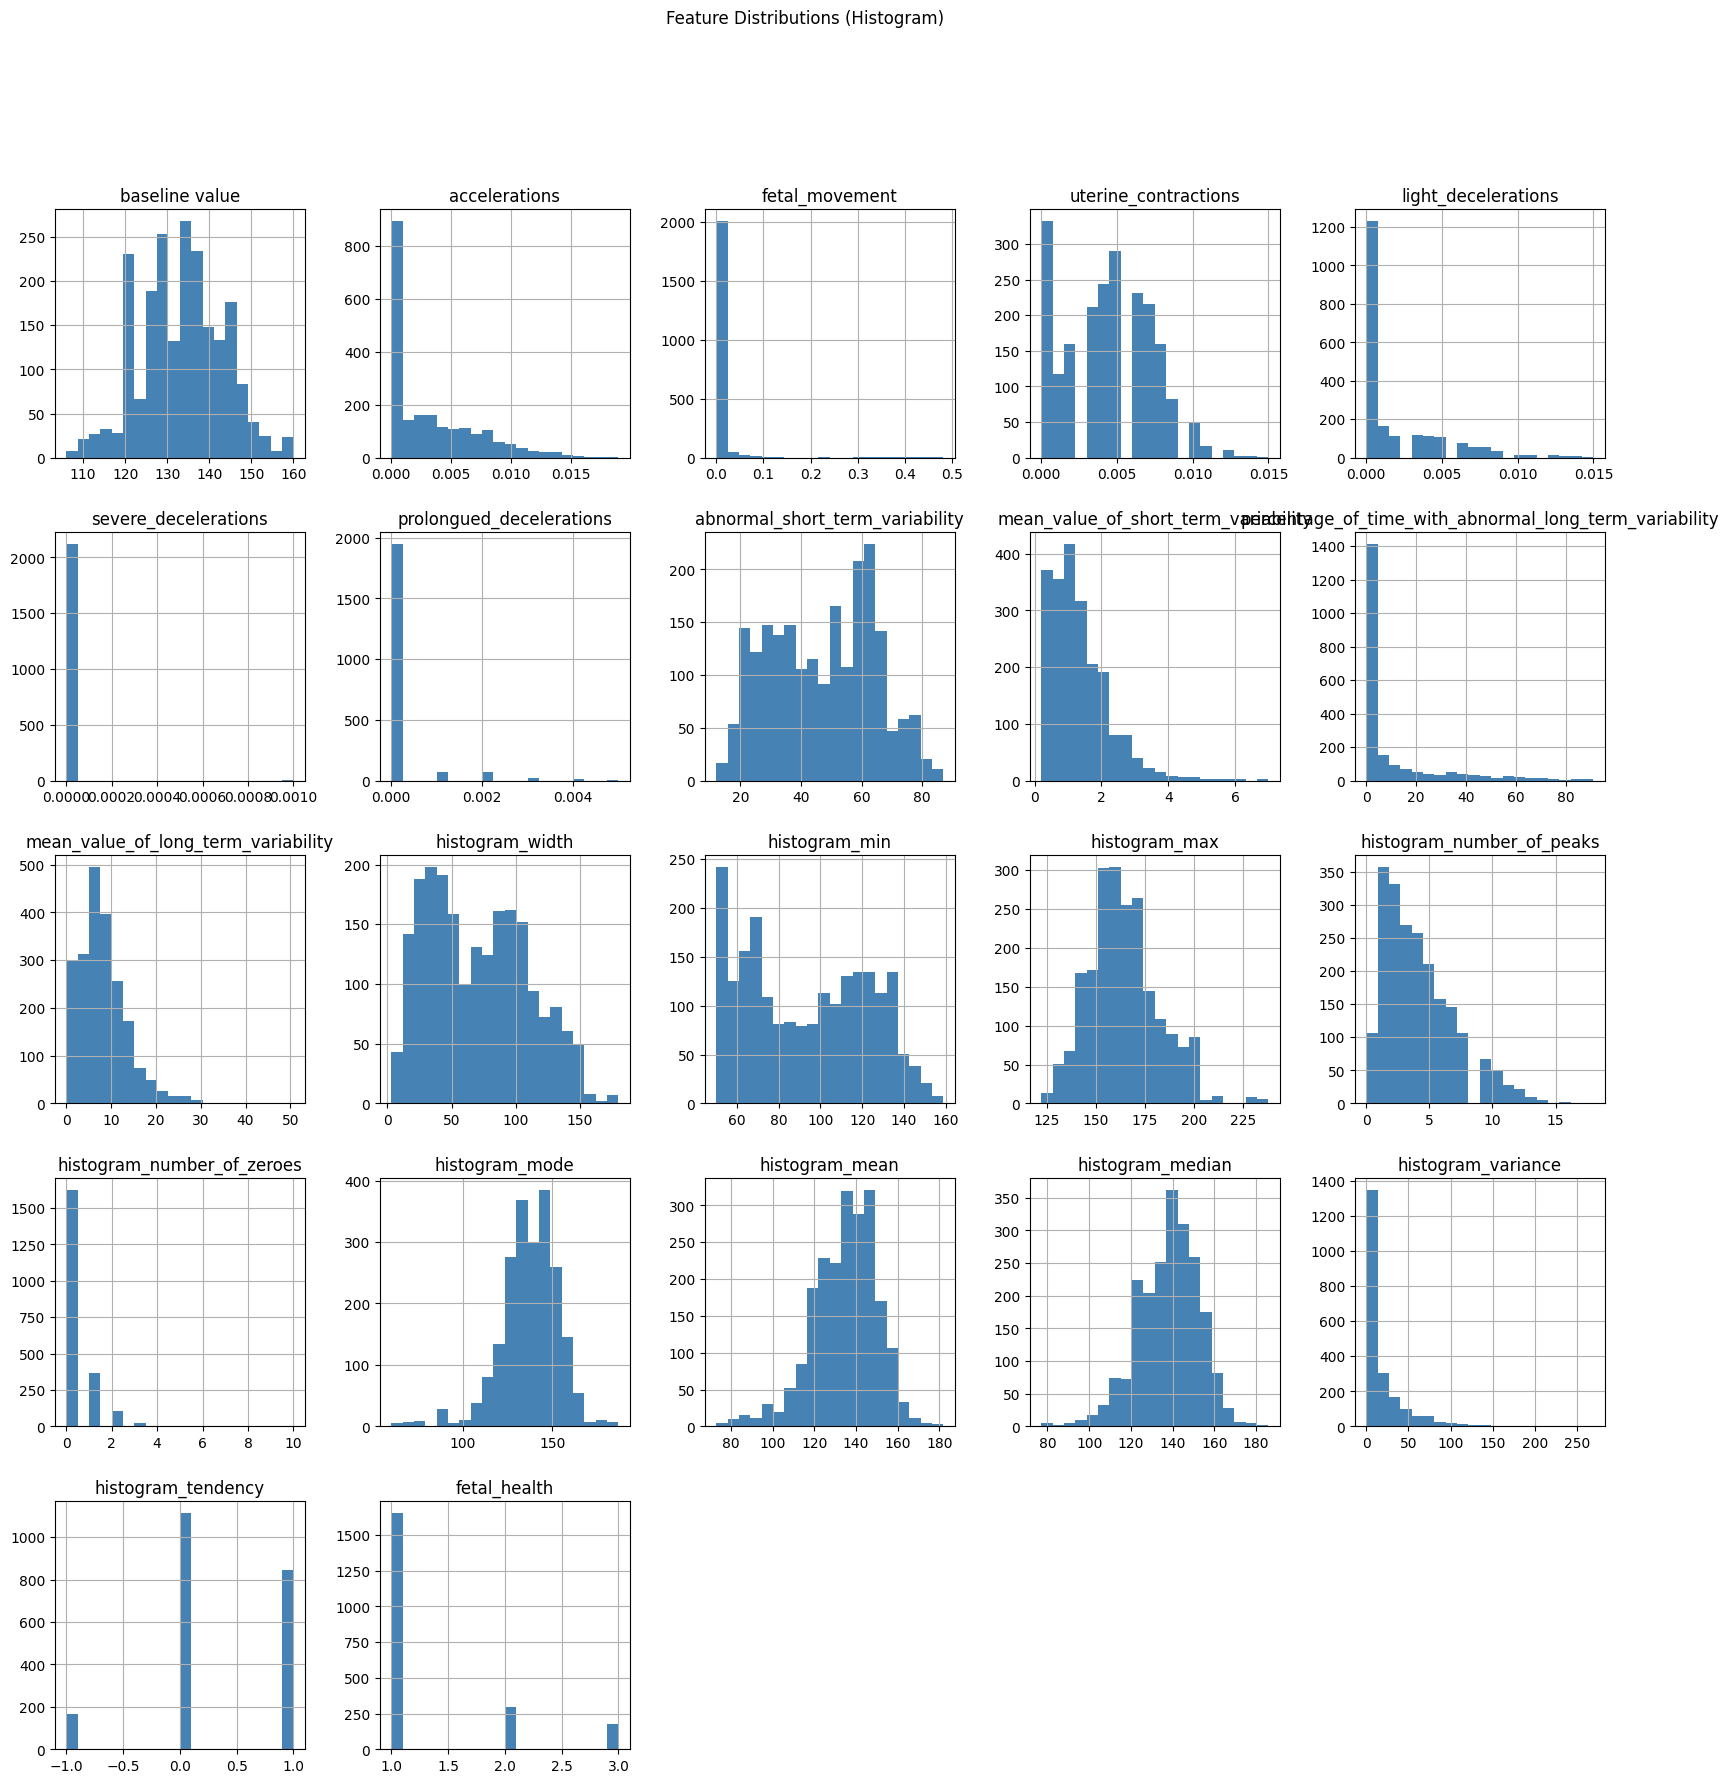

In [7]:
df.hist(bins=20, figsize=(20,20), color="steelblue")
plt.suptitle("Feature Distributions (Histogram)")
plt.show()


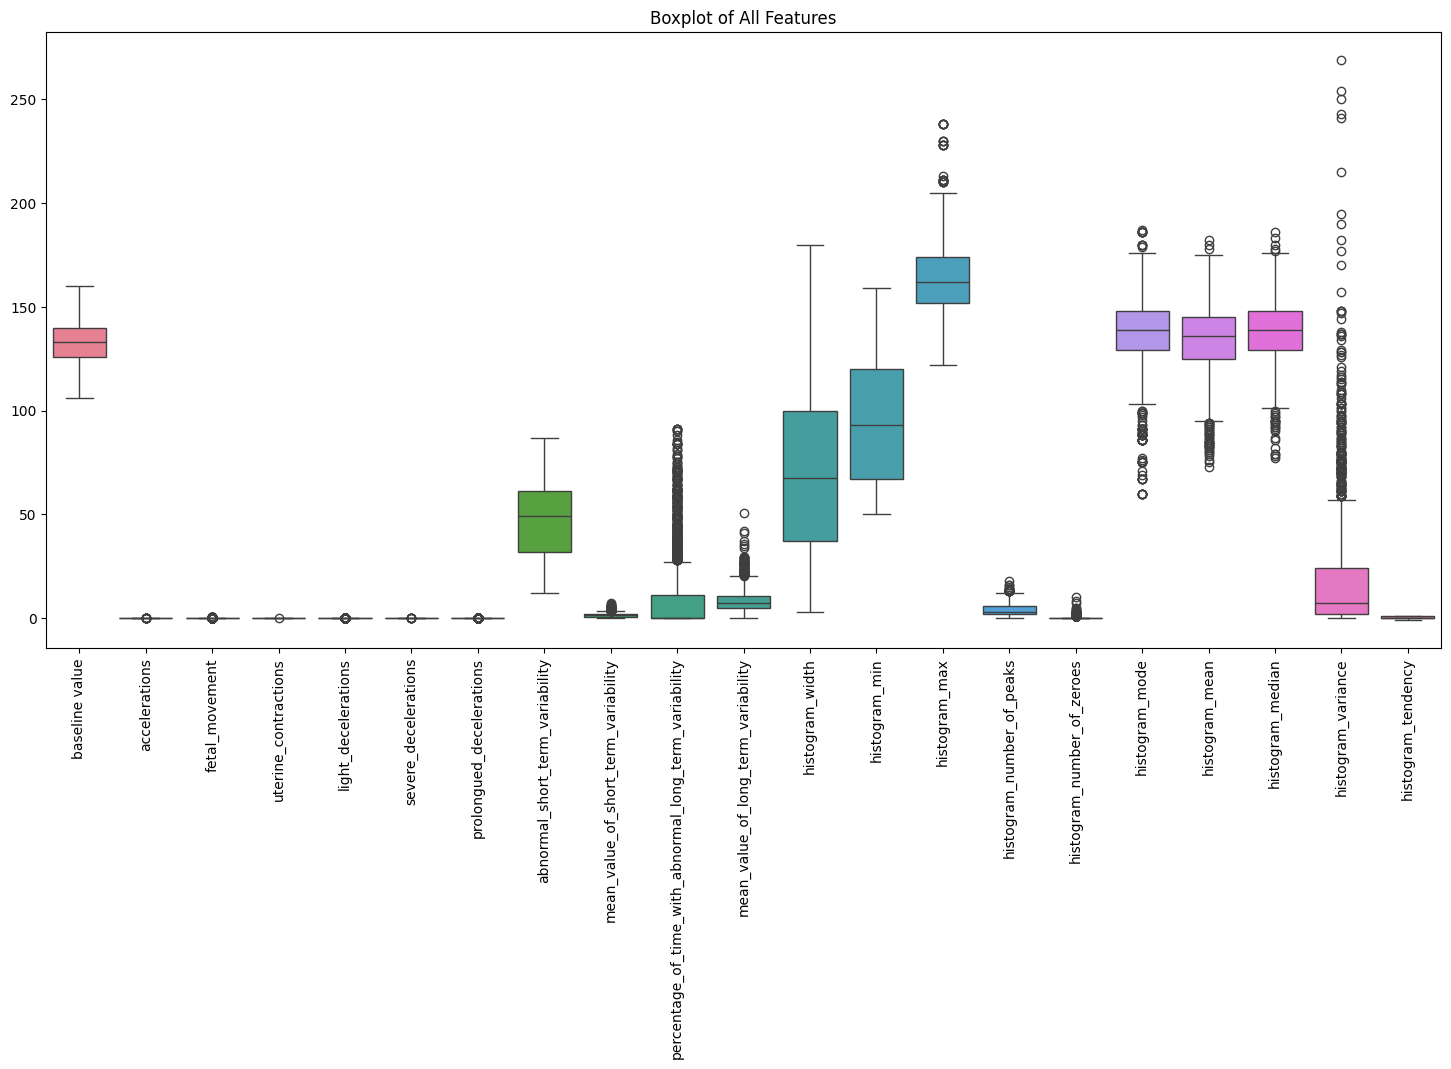

In [8]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df.drop(columns=["fetal_health"]))
plt.xticks(rotation=90)
plt.title("Boxplot of All Features")
plt.show()


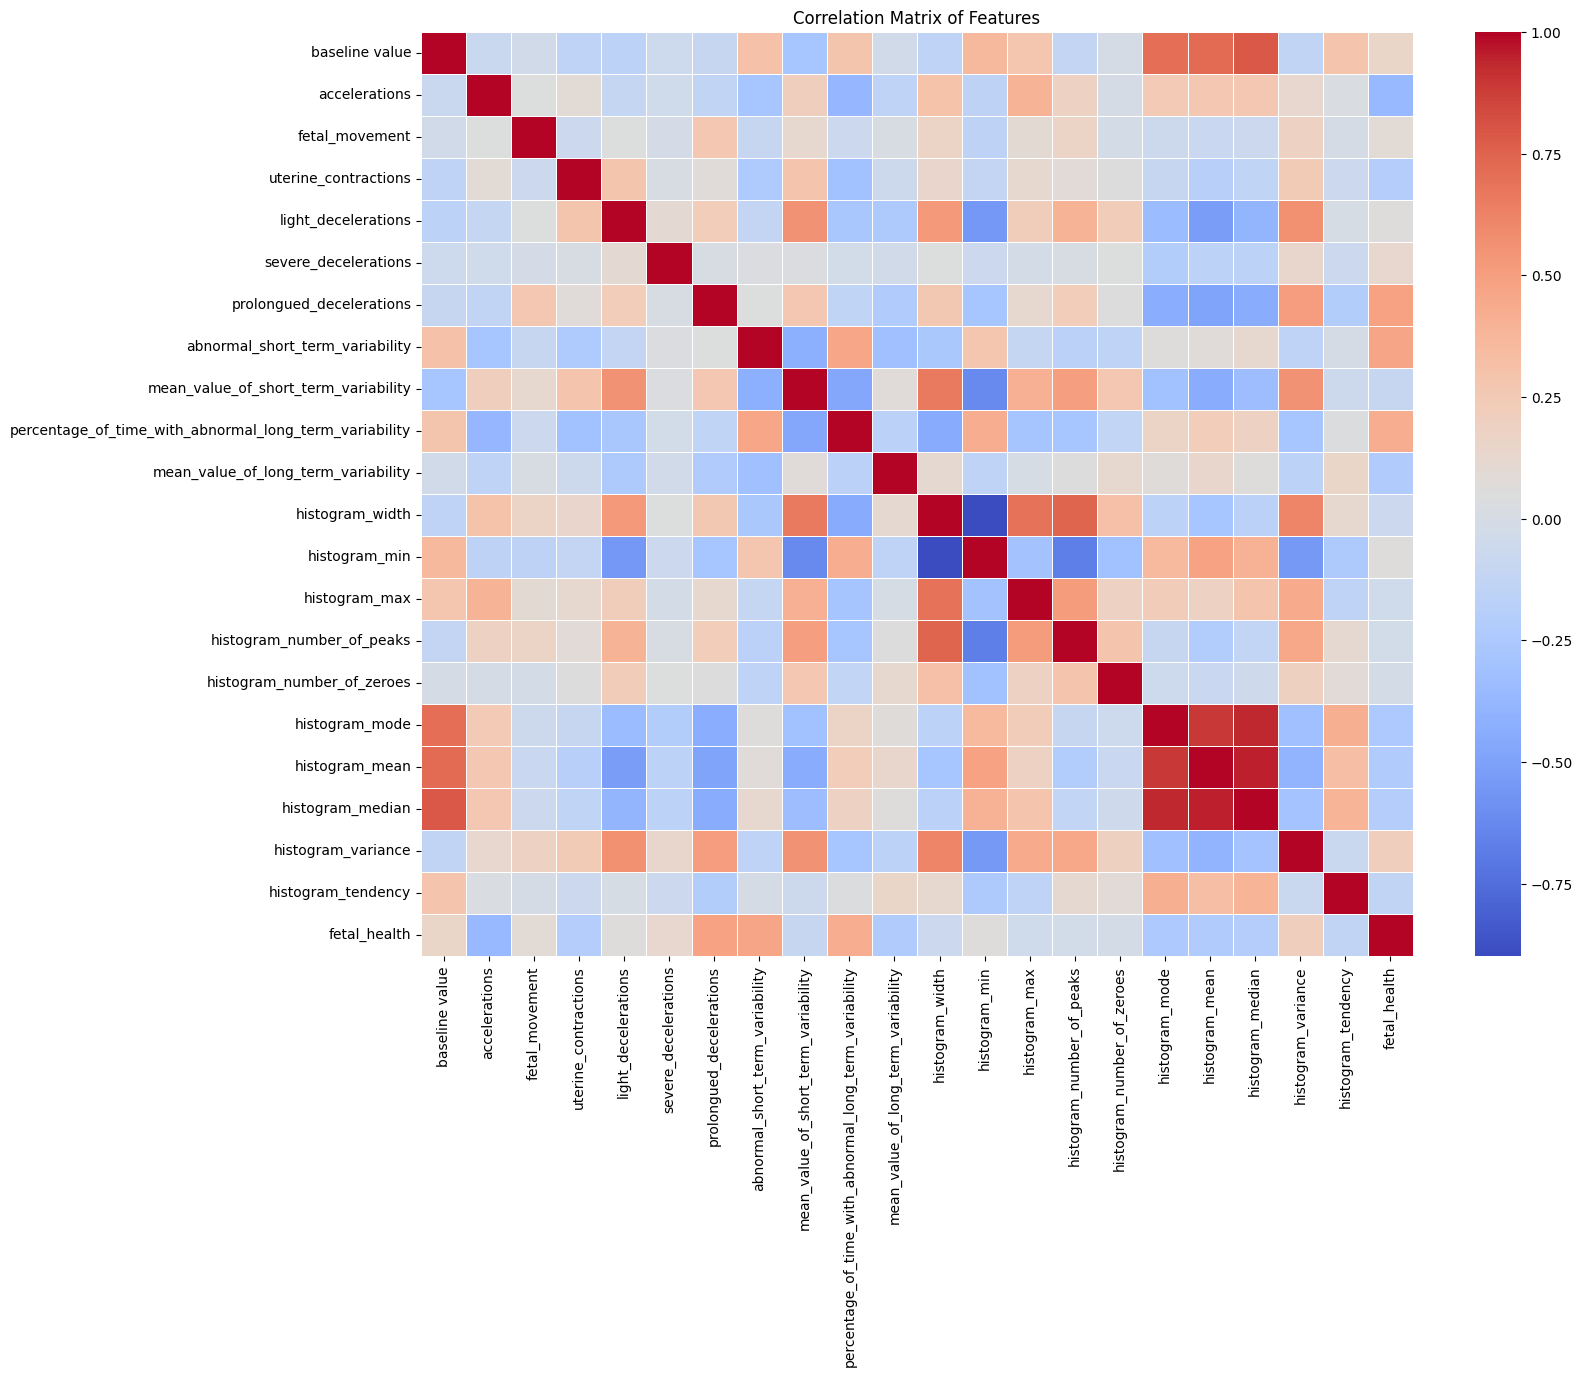

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [10]:
target_corr = corr_matrix["fetal_health"].sort_values(ascending=False)
print(target_corr)


fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [11]:
# Check missing values
df.isnull().sum()

# Drop duplicates if present
df = df.drop_duplicates()


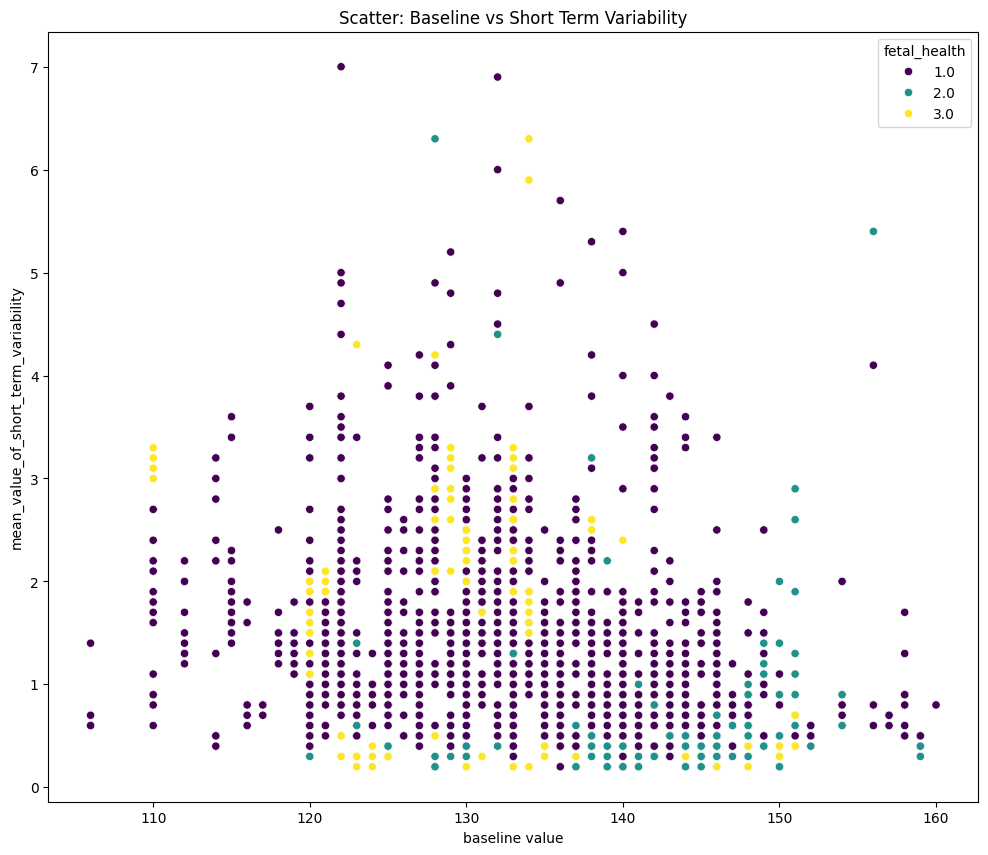

In [12]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="baseline value", y="mean_value_of_short_term_variability",
                hue="fetal_health", data=df, palette="viridis")
plt.title("Scatter: Baseline vs Short Term Variability")
plt.show()


In [13]:
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)
